<a href="https://colab.research.google.com/github/morteza-sakifard/density-estimation/blob/main/Non_Parametric_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

# Generate 2D Class

In [2]:
def get_dataset(mean, cov, size):
  dataset = np.random.multivariate_normal(mean, cov, size)
  return pd.DataFrame(dataset)

# Get Dataset Extremum

In [3]:
def get_extremum(dataset):
  return (dataset.min(), dataset.max())

# Generate Grid

In [4]:
def get_grid(dataset):
  x_min, x_max = get_extremum(dataset.iloc[:, 0])
  y_min, y_max = get_extremum(dataset.iloc[:, 1])
  return np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

# Plot Dataset

In [5]:
def plot_dataset(dataset, title):
  fig, ax = plt.subplots(figsize=(8, 6))
  ax.plot(dataset.iloc[:, 0], dataset.iloc[:, 1], '.')
  ax.axis('equal')
  ax.set_title(title)
  fig.show()

# Plot Density

In [6]:
def plot_density(density, dataset, title):
  x_min, x_max = get_extremum(dataset.iloc[:, 0])
  y_min, y_max = get_extremum(dataset.iloc[:, 1])
  x_grid, y_grid = get_grid(dataset)
  #create figure with title 
  fig = plt.figure(figsize=(18,8))
  plt.suptitle(title, fontsize=14)
  #plot 2D in first column
  ax = fig.add_subplot(121)
  ax.imshow(np.rot90(density), cmap=plt.cm.gist_earth_r, extent=[x_min, x_max, y_min, y_max])
  ax.plot(dataset.iloc[:, 0], dataset.iloc[:, 1], 'k.', markersize=6);
  ax.set_xlim([x_min, x_max])
  ax.set_ylim([y_min, y_max])
  #plot 3D in second column
  ax = fig.add_subplot(122, projection='3d')
  ax.plot_surface(x_grid, y_grid, density, cmap='viridis', linewidth=0)
  ax.set_xlabel('X axis')
  ax.set_ylabel('Y axis')
  ax.set_zlabel('Z axis');

# Get Gaussian Density

In [7]:
def get_gaussian_density(dataset, mean, cov):
  x_grid, y_grid = get_grid(dataset)
  positions = np.dstack((x_grid, y_grid))
  return stats.multivariate_normal.pdf(positions, mean, cov)

# Estimate Bimodal Density

## Initialize

In [8]:
means = np.array([[0, 5],
                  [5, 0]])
covs = np.array([
                 [[1, 1], [1, 2]],
                 [[1, -1], [-1, 4]]
                 ])

## Generate Samples

In [9]:
sample_size = 200
datasets = list()
for mean, cov in zip(means, covs):
  datasets.append(get_dataset(mean, cov, sample_size // means.shape[0]))
dataset = pd.concat(datasets)

## Plot Samples

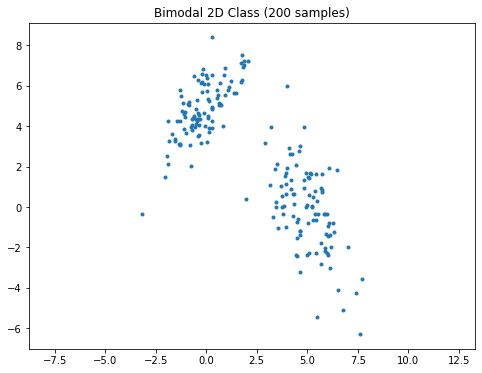

In [10]:
plot_dataset(dataset, 'Bimodal 2D Class (' + str(len(dataset)) + ' samples)')

## Get True Density

In [11]:
true_densities = list()
for mean, cov in zip(means, covs):
  true_densities.append(0.5 * get_gaussian_density(dataset, mean, cov))
true_density = sum(true_densities)

## Plot True Density

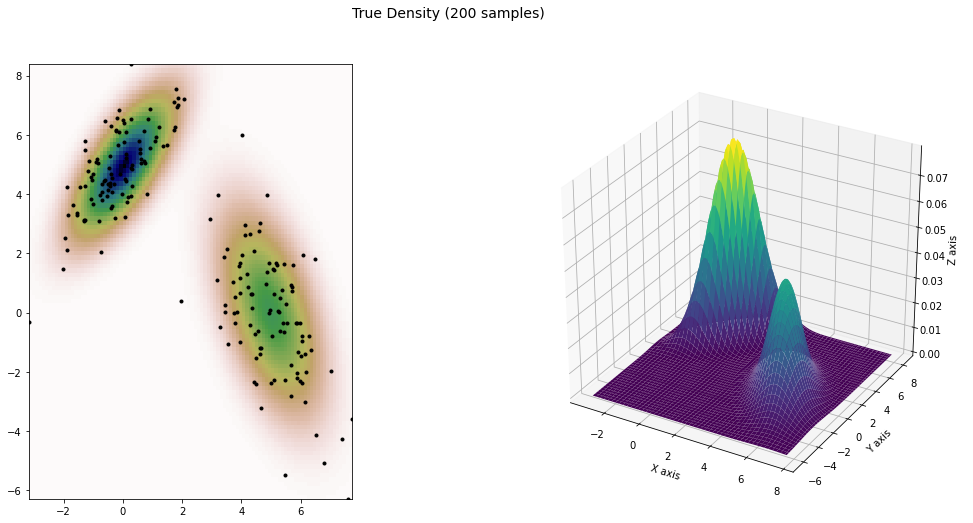

In [12]:
plot_density(true_density, dataset, 'True Density (' + str(len(dataset)) + ' samples)')

## Kernel Density Estimation

### Gaussian Kernel

In [13]:
def get_gaussian_kde(dataset):
  x_grid, y_grid = get_grid(dataset)
  positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
  samples = np.vstack([dataset.iloc[:, 0], dataset.iloc[:, 1]])
  kernel = stats.gaussian_kde(samples)
  return np.reshape(kernel(positions), x_grid.shape)

#### Estimate Density

In [14]:
estimated_density = get_gaussian_kde(dataset)

#### Plot Density

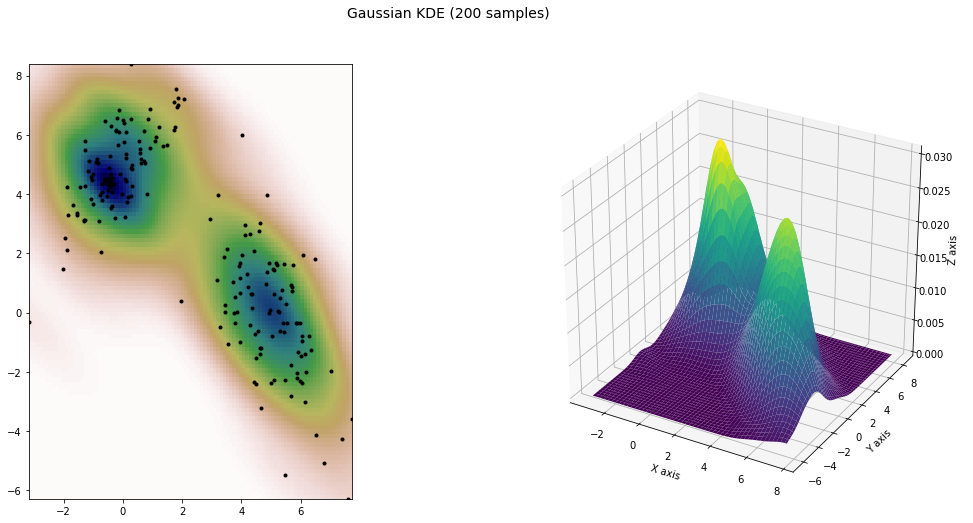

In [15]:
plot_density(estimated_density, dataset, 'Gaussian KDE (' + str(len(dataset)) + ' samples)')

### Parzen Window

In [16]:
def multiply_list(number_list):
  result = 1
  for element in number_list:
    result *= element
  return result

In [17]:
def get_kernel(u):
  return 1 if np.abs(u) < (1 / 2) else 0

In [18]:
def get_probability(x, samples, h):
  dimentions = samples.shape[1]
  k = np.sum(multiply_list([get_kernel((x[dim] - sample[dim]) / h) for dim in range(dimentions)]) for sample in samples) # Number of sample in window
  v = h ** dimentions   # Window size 
  n = samples.shape[1]  # Sample size
  return k / (n * v)

#### Parzen Window Density Estimator

In [19]:
def get_parzen_kde(dataset, h):
  dimension = dataset.shape[1]
  x_grid, y_grid = get_grid(dataset)
  positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
  samples = np.vstack([dataset.iloc[:, 0], dataset.iloc[:, 1]])
  estimated_density = list()
  for x in positions.T:
    px = get_probability(x, samples.T, h)
    estimated_density.append(px)
  return np.array(estimated_density).reshape(x_grid.shape)

#### Estimate Density

##### h = 0.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


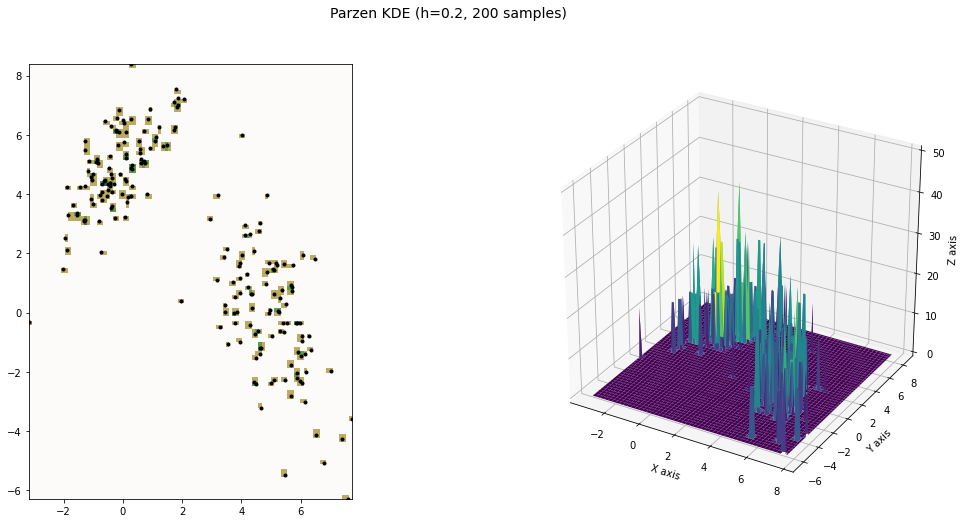

In [20]:
h = 0.2
estimated_density = get_parzen_kde(dataset, h)
plot_density(estimated_density, dataset, 'Parzen KDE (h='+ str(h) +', '+ str(len(dataset)) +' samples)')

##### h = 0.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


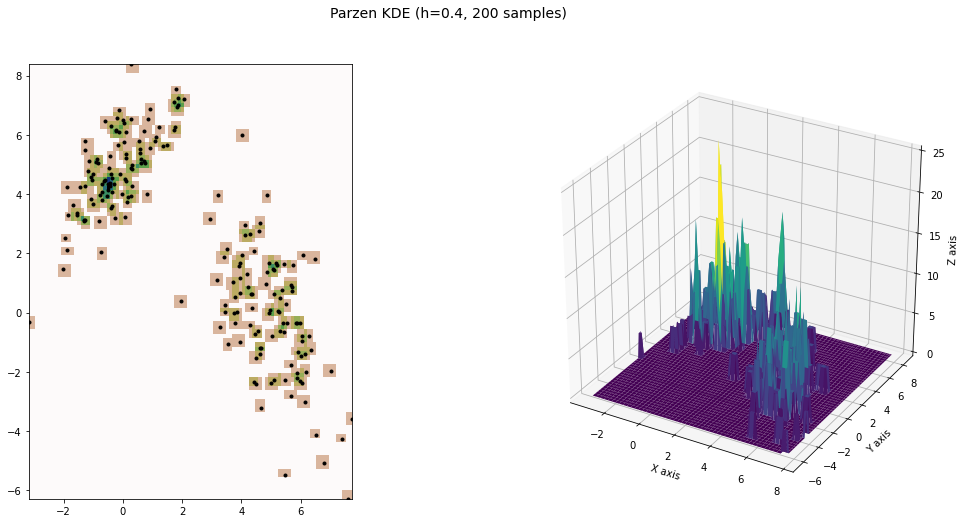

In [21]:
h = 0.4
estimated_density = get_parzen_kde(dataset, h)
plot_density(estimated_density, dataset, 'Parzen KDE (h=' + str(h) + ', ' + str(len(dataset)) + ' samples)')

##### h = 0.8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


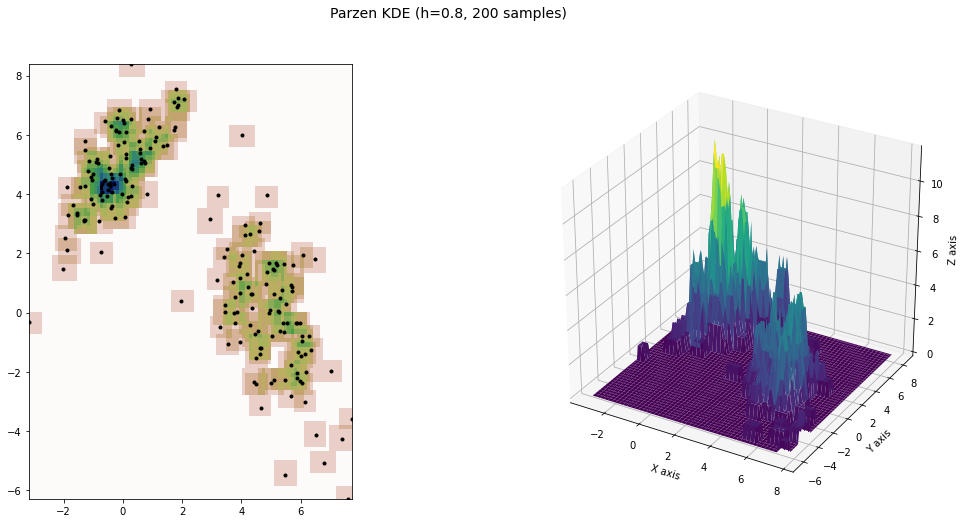

In [22]:
h = 0.8
estimated_density = get_parzen_kde(dataset, h)
plot_density(estimated_density, dataset, 'Parzen KDE (h=' + str(h) + ', ' + str(len(dataset)) + ' samples)')

##### h = 1.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


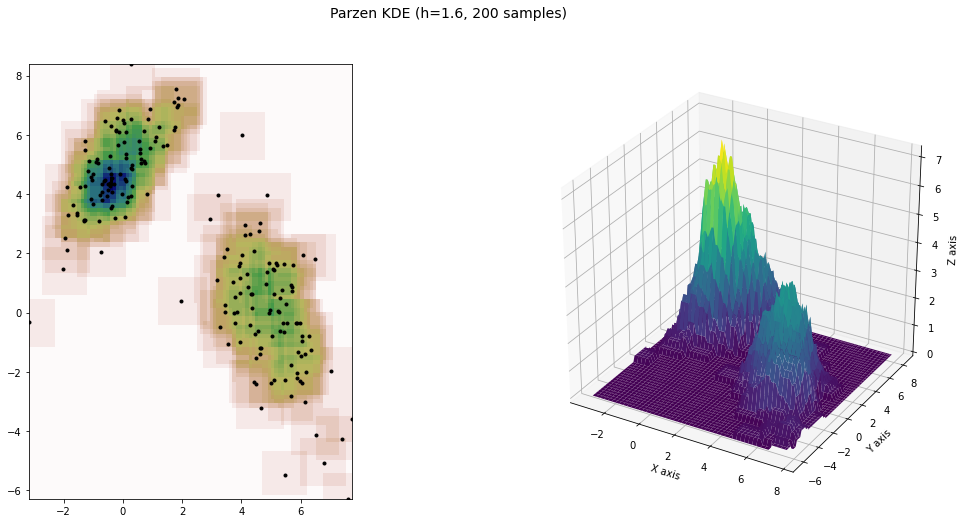

In [23]:
h = 1.6
estimated_density = get_parzen_kde(dataset, h)
plot_density(estimated_density, dataset, 'Parzen KDE (h=' + str(h) + ', ' + str(len(dataset)) + ' samples)')

## K-Nearest Neighbors Density Estimation

### Get Distance
Between given X and each sample point

In [24]:
# np.linalg.norm(sample - x) is equal to:
# np.sqrt(np.sum((sample - x) ** 2 ))
def get_distance(x, samples, k):
  for sample in samples:
    distances = np.array([np.linalg.norm(sample - x) for sample in samples])
    return np.sort(distances)[k - 1]

### KNN Density Estimator

In [25]:
def get_knn_density_estimation(dataset, k):
  x_grid, y_grid = get_grid(dataset)
  positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
  samples = np.vstack([dataset.iloc[:, 0], dataset.iloc[:, 1]])
  estimated_density = list()
  for x in positions.T:
    v = np.pi * (get_distance(x, samples.T, k) ** 2)
    px = 1 if v == 0 else k / (sample_size * v)
    estimated_density.append(px)
  return np.array(estimated_density).reshape(x_grid.shape)

### Estimate Density

#### With 1-Nearest Neighbors

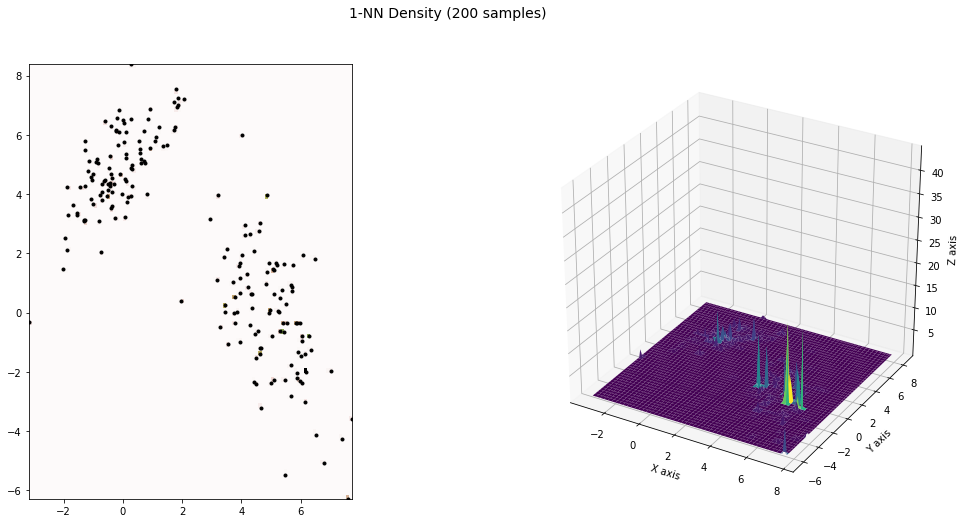

In [26]:
k = 1
estimated_density = get_knn_density_estimation(dataset, k)
plot_density(estimated_density, dataset, str(k) + '-NN Density (' + str(len(dataset)) + ' samples)')

#### With 3-Nearest Neighbors

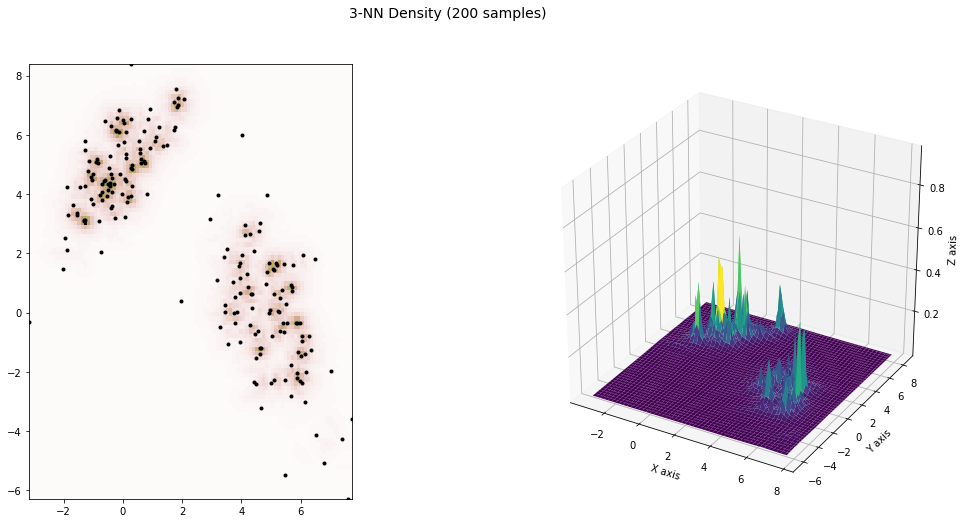

In [27]:
k = 3
estimated_density = get_knn_density_estimation(dataset, k)
plot_density(estimated_density, dataset, str(k) + '-NN Density (' + str(len(dataset)) + ' samples)')

#### With 10-Nearest Neighbors

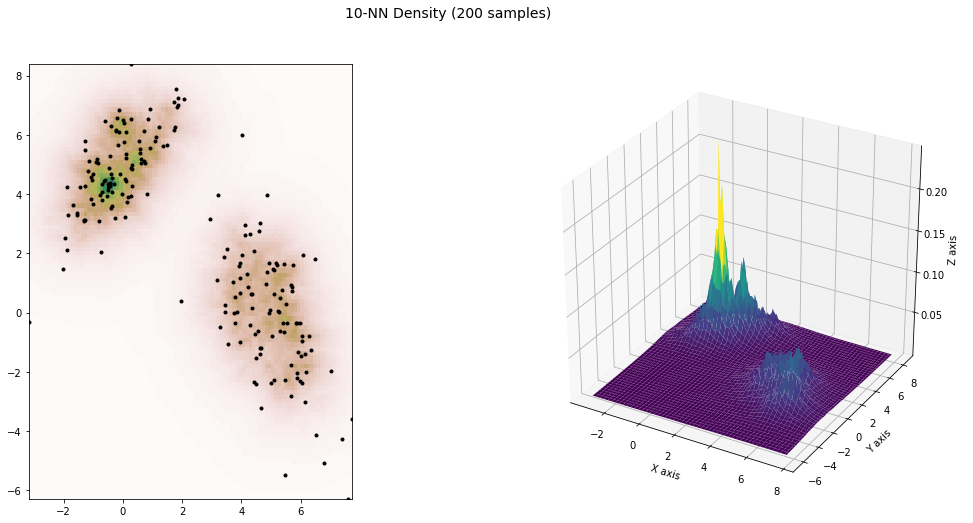

In [28]:
k = 10
estimated_density = get_knn_density_estimation(dataset, k)
plot_density(estimated_density, dataset, str(k) + '-NN Density (' + str(len(dataset)) + ' samples)')

#### With 30-Nearest Neighbors

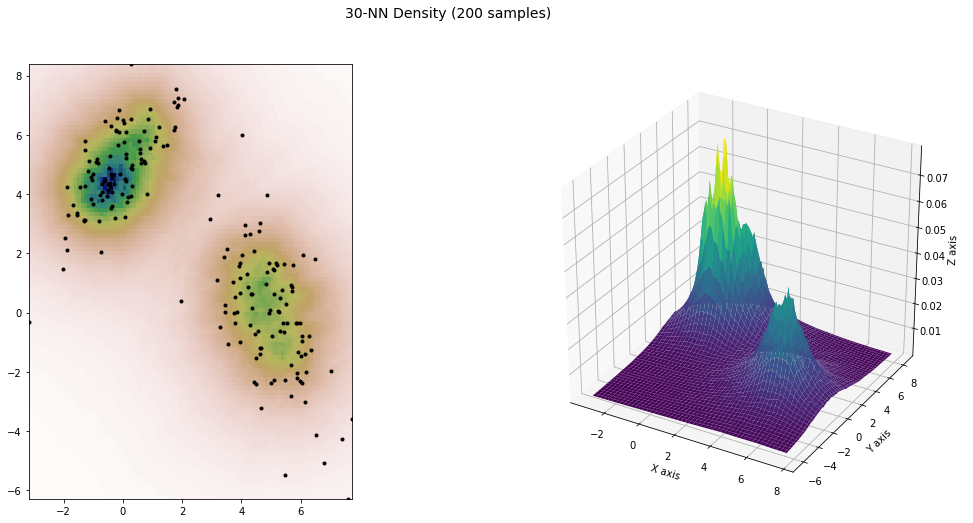

In [29]:
k = 30
estimated_density = get_knn_density_estimation(dataset, k)
plot_density(estimated_density, dataset, str(k) + '-NN Density (' + str(len(dataset)) + ' samples)')